In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

mls_svd = pd.read_csv('./output/pred_algo_exp/ml-latest-small_svd.csv')
mls_sone = pd.read_csv('./output/pred_algo_exp/ml-latest-small_slopeone.csv')
mls_nmf = pd.read_csv('./output/pred_algo_exp/ml-latest-small_nmf.csv')

personality_svd = pd.read_csv('./output/pred_algo_exp/personality_svd.csv')
personality_sone = pd.read_csv('./output/pred_algo_exp/personality_slopeone.csv')
personality_nmf = pd.read_csv('./output/pred_algo_exp/personality_nmf.csv')

ml_svd = pd.read_csv('./output/pred_algo_exp/ml-latest_svd.csv')
ml_sone = pd.read_csv('./output/pred_algo_exp/ml-latest_slopeone.csv')
ml_nmf = pd.read_csv('./output/pred_algo_exp/ml-latest_nmf.csv')

ml1m_svd = pd.read_csv('./output/pred_algo_exp/ml-1m_svd.csv')
ml1m_sone = pd.read_csv('./output/pred_algo_exp/ml-1m_slopeone.csv')
ml1m_nmf = pd.read_csv('./output/pred_algo_exp/ml-1m_nmf.csv')

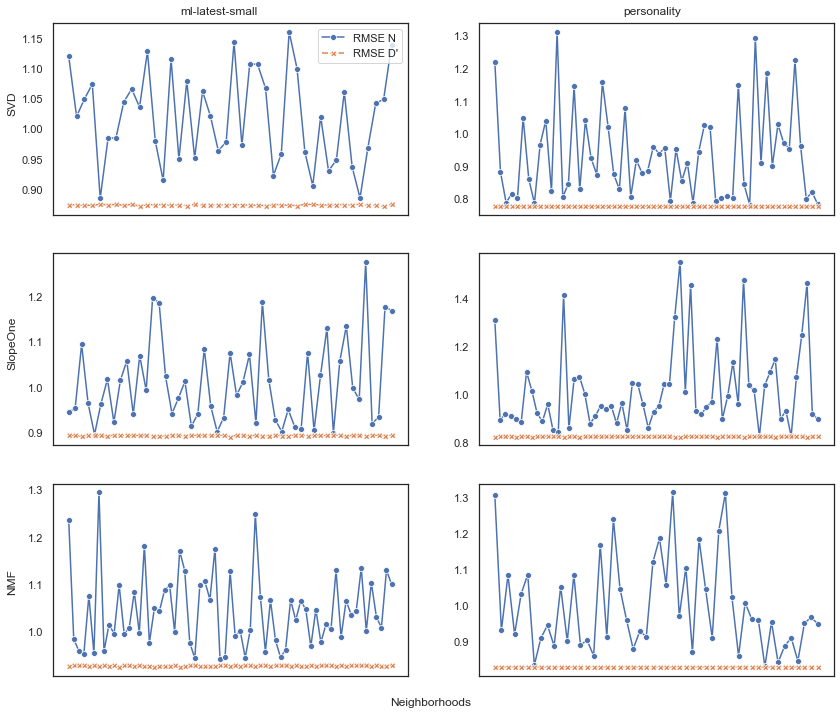

In [27]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
mls_svd_rmse = melt_df(mls_svd, ['rmse_nbhd','rmse_equiv'])
mls_sone_rmse = melt_df(mls_sone, ['rmse_nbhd','rmse_equiv'])
mls_nmf_rmse = melt_df(mls_nmf, ['rmse_nbhd','rmse_equiv'])
personality_svd_rmse = melt_df(personality_svd, ['rmse_nbhd','rmse_equiv'])
personality_sone_rmse = melt_df(personality_sone, ['rmse_nbhd','rmse_equiv'])
personality_nmf_rmse = melt_df(personality_nmf, ['rmse_nbhd','rmse_equiv'])

fig, ax = plt.subplots(3,2, figsize=(14, 12))

sns.lineplot(x=mls_svd_rmse.Index, y="Value", hue="Variable", data=mls_svd_rmse, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=mls_sone_rmse.Index, y="Value", hue="Variable", data=mls_sone_rmse, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=mls_nmf_rmse.Index, y="Value", hue="Variable", data=mls_nmf_rmse, ax=ax[2,0], markers=True, style="Variable")
sns.lineplot(x=personality_svd_rmse.Index, y="Value", hue="Variable", data=personality_svd_rmse, ax=ax[0,1], markers=True, style="Variable")
sns.lineplot(x=personality_sone_rmse.Index, y="Value", hue="Variable", data=personality_sone_rmse, ax=ax[1,1], markers=True, style="Variable")
sns.lineplot(x=personality_nmf_rmse.Index, y="Value", hue="Variable", data=personality_nmf_rmse, ax=ax[2,1], markers=True, style="Variable")

# Legend labels
ax[0,0].legend(labels=['RMSE N', 'RMSE D\''])

fig.text(0.5, 0.09, 'Neighborhoods', ha='center')
fig.text(0.29, 0.89, 'ml-latest-small', ha='center')
fig.text(0.72, 0.89, 'personality', ha='center')
fig.text(0.08, 0.2337, 'NMF', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'SlopeOne', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'SVD', va='center', rotation='vertical')

for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # remove x-axis
        ax[i,j].set(xticklabels=[])

        # only keep legend for first row
        if j == 0 and i == 0:
            continue
        ax[i,j].get_legend().remove()

plt.savefig('./output/pred_algo_exp/exp_2_scatter.png', dpi=800, bbox_inches='tight')

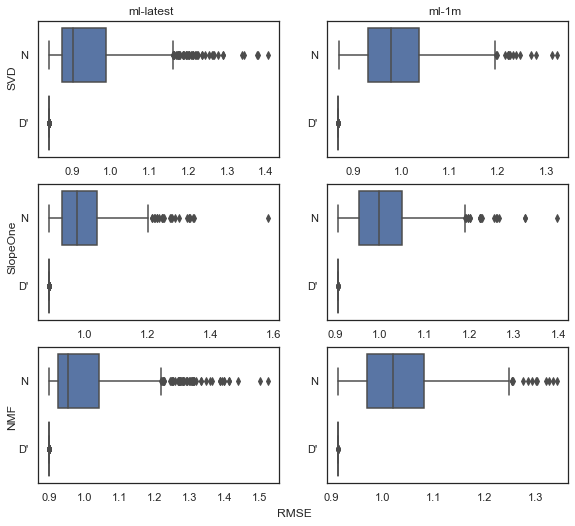

In [28]:
fig, ax = plt.subplots(3,2, figsize=(9.5, 8.5))

# bigger datasets - use box plots
ml_svd_rmse = ml_svd[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml_sone_rmse = ml_sone[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml_nmf_rmse = ml_nmf[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)

ml1m_svd_rmse = ml1m_svd[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml1m_sone_rmse = ml1m_sone[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml1m_nmf_rmse = ml1m_nmf[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)

sns.boxplot(x="Value", y="Variable", data=ml_svd_rmse, ax=ax[0,0])
sns.boxplot(x="Value", y="Variable", data=ml_sone_rmse, ax=ax[1,0])
sns.boxplot(x="Value", y="Variable", data=ml_nmf_rmse, ax=ax[2,0])
sns.boxplot(x="Value", y="Variable", data=ml1m_svd_rmse, ax=ax[0,1])
sns.boxplot(x="Value", y="Variable", data=ml1m_sone_rmse, ax=ax[1,1])
sns.boxplot(x="Value", y="Variable", data=ml1m_nmf_rmse, ax=ax[2,1])


fig.text(0.5, 0.07, 'RMSE', ha='center')
fig.text(0.29, 0.89, 'ml-latest', ha='center')
fig.text(0.72, 0.89, 'ml-1m', ha='center')
fig.text(0.08, 0.2337, 'NMF', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'SlopeOne', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'SVD', va='center', rotation='vertical')


for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

plt.savefig('./output/pred_algo_exp/exp_2_box.png', dpi=800, bbox_inches='tight')

C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_12948\1079476761.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = df_2.append(df_1)
C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_12948\1079476761.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df_3)


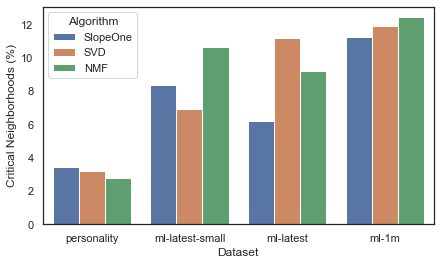

In [29]:
svd = {
    'Dataset': ['personality', 'ml-latest-small', 'ml-latest', 'ml-1m'],
    'perc_critical': [3.19, 6.89, 11.2, 11.89],
}

slopeone = {
    'Dataset': ['personality', 'ml-latest-small', 'ml-latest', 'ml-1m'],
    'perc_critical': [3.41, 8.36, 6.18, 11.24],
}

nmf = {
    'Dataset': ['personality', 'ml-latest-small', 'ml-latest', 'ml-1m'],
    'perc_critical': [2.75, 10.66, 9.17, 12.42],
}

df_1 = pd.DataFrame(data=svd)
df_2 = pd.DataFrame(data=slopeone)
df_3 = pd.DataFrame(data=nmf)

df_1['Algorithm'] = 'SVD'
df_2['Algorithm'] = 'SlopeOne'
df_3['Algorithm'] = 'NMF'

test_df = df_2.append(df_1)
test_df = test_df.append(df_3)

fig, ax =plt.subplots(figsize=(7, 4))
sns.set_theme(style="ticks") # white, dark, whitegrid, darkgrid, ticks

sns.barplot(x="Dataset", y="perc_critical", hue="Algorithm", data=test_df)

ax.set_xlabel("Dataset")
ax.set_ylabel("Critical Neighborhoods (%)")

plt.savefig('./output/pred_algo_exp/exp_2_critical_nbhds.png', dpi=800, bbox_inches='tight')

In [39]:
import functools as ft

# common in 3
# dfs = [mls_svd, mls_nmf, mls_sone]
# dfs = [personality_svd, personality_nmf, personality_sone]
# dfs = [ml1m_svd, ml1m_nmf, ml1m_sone]
dfs = [ml_svd, ml_nmf, ml_sone]

# common in just 2
dfs_2 = [dfs[0], dfs[1]]
dfs_3 = [dfs[1], dfs[2]]
dfs_4 = [dfs[0], dfs[2]]

df_final_1 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs)

df_2_1 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_2)
df_2_1 = df_2_1[~(df_2_1['uid'].isin(df_final_1.uid.to_list()))]
df_2_2 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_3)
df_2_2 = df_2_2[~(df_2_2['uid'].isin(df_final_1.uid.to_list()))]
df_2_3 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_4)
df_2_3 = df_2_3[~(df_2_3['uid'].isin(df_final_1.uid.to_list()))]

total_critical_nbhds = len(pd.concat(dfs))
total_df_final = round((len(df_final_1) / total_critical_nbhds) * 100, 2)
total_in_two = round((len(pd.concat([df_2_1, df_2_2, df_2_3])) / total_critical_nbhds) * 100, 2)
total_in_one = round(((total_critical_nbhds - (total_df_final + total_in_two)) / total_critical_nbhds) * 100, 2)

print('Total number of common in the three algos:', total_df_final)
print('Total number of common between two:', total_in_two)
print('Total number of critical in just one:', total_in_one)

Total number of common in the three algos: 2.03
Total number of common between two: 23.55
Total number of critical in just one: 99.42
